<a href="https://colab.research.google.com/github/lucasmoncada08/cat-vs-dog-classifier/blob/master/Dogs_vs_Cats_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing the Data

In [ ]:
import zipfile
import os

local_train_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_train_zip, 'r')
#os.mkdir('/Dogs-vs-Cats-Classifier')
zip_ref.extractall('/Dogs-vs-Cats-Classifier')
zip_ref.close()

In [10]:
import shutil
import os

base_dir = '/Dogs-vs-Cats-Classifier/dogs-vs-cats'
os.mkdir(base_dir)

# Setting up train, validation, and test sets
train_dir = os.path.join(base_dir, 'train-set')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'val-set')
os.mkdir(val_dir)
test_dir = os.path.join(base_dir, 'test-set')
os.mkdir(test_dir)

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with validation cat/dog pictures
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

# Directory with training cat/dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [12]:
original_dataset_dir = '/Dogs-vs-Cats-Classifier/train'

# Organizing the Cats data
fnames = ['cat.{}.jpg'.format(i) for i in range(12500)]
for fname in fnames[:10000]:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)
for fname in fnames[10000:11250]:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(val_cats_dir, fname)
  shutil.copyfile(src, dst)
for fname in fnames[11250:12500]:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

# Organizing the Dogs data
fnames = ['dog.{}.jpg'.format(i) for i in range(12500)]
for fname in fnames[:10000]:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)
for fname in fnames[10000:11250]:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(val_dogs_dir, fname)
  shutil.copyfile(src, dst)
for fname in fnames[11250:12500]:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [13]:
# Sanity check to ensure number of images is correct
print('Training cat images:', len(os.listdir(train_cats_dir)))
print('Training dog images:', len(os.listdir(train_dogs_dir)))
print('Validation cat images:', len(os.listdir(val_cats_dir)))
print('Validation dog images:', len(os.listdir(val_dogs_dir)))
print('Test cat images:', len(os.listdir(test_cats_dir)))
print('Test dog images:', len(os.listdir(test_dogs_dir)))

Training cat images: 10000
Training dog images: 10000
Validation cat images: 1250
Validation dog images: 1250
Test cat images: 1250
Test dog images: 1250


#Developing the Model

## Developing a Model that Beats the Baseline

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150),
    batch_size=40, class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(150, 150),
    batch_size=25, class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150),
    batch_size=25, class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [25]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(3, 3), activation='relu',
         strides=(2, 2), input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=9216, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 74, 74, 96)        2688      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 96)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 36, 36, 256)       614656    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 17, 17, 384)       885120    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 17, 17, 384)       1327488   
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 17, 17, 256)      

In [26]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=500,
                              epochs=30,
                              validation_data=val_generator,
                              validation_steps=100)

Epoch 1/30
500/500 [==============================] - 180s 360ms/step - loss: 0.6480 - acc: 0.6237 - val_loss: 0.6228 - val_acc: 0.7388
Epoch 2/30
500/500 [==============================] - 171s 342ms/step - loss: 0.5182 - acc: 0.7467 - val_loss: 0.2840 - val_acc: 0.7808
Epoch 3/30
500/500 [==============================] - 170s 341ms/step - loss: 0.4330 - acc: 0.8045 - val_loss: 0.4299 - val_acc: 0.8240
Epoch 4/30
500/500 [==============================] - 170s 341ms/step - loss: 0.3579 - acc: 0.8450 - val_loss: 0.4249 - val_acc: 0.8380
Epoch 5/30
500/500 [==============================] - 170s 341ms/step - loss: 0.2941 - acc: 0.8767 - val_loss: 0.4369 - val_acc: 0.8852
Epoch 6/30
500/500 [==============================] - 170s 341ms/step - loss: 0.2484 - acc: 0.9000 - val_loss: 0.2542 - val_acc: 0.8796
Epoch 7/30
500/500 [==============================] - 170s 341ms/step - loss: 0.2119 - acc: 0.9143 - val_loss: 0.0839 - val_acc: 0.8964
Epoch 8/30
500/500 [============================

In [28]:
model.evaluate_generator(test_generator, steps=100)

[0.09075120836496353, 0.920799970626831]

In [51]:
import matplotlib.pyplot as plt

def plot_model_acc_and_loss(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc)+1)

  plt.plot(epochs, acc, 'bo', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

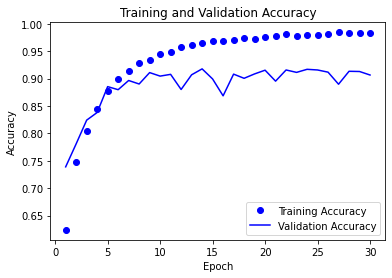

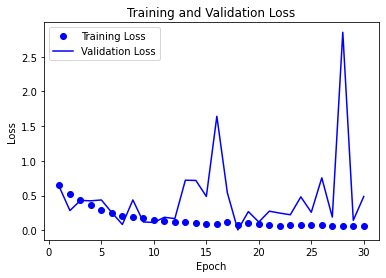

In [30]:
plot_model_acc_and_loss(history)

## Modifying the Model to Generalize Better

In [40]:
# Augmenting the Data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(200, 200),
    batch_size=80, class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(200, 200),
    batch_size=25, class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(200, 200),
    batch_size=25, class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [45]:
from keras.layers import BatchNormalization, Dropout

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(7, 7), activation='relu',
         strides=(4, 4), input_shape=(200, 200, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=192, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

In [42]:
# Callbacks
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, verbose=1)
earlystop = EarlyStopping(patience=10)

callbacks = [reduce_lr, earlystop]

In [46]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 50, 50, 96)        14208     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 96)        384       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 24, 24, 96)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 192)       460992    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 192)       768       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 11, 11, 192)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 11, 256)     

In [48]:
hist = model.fit_generator(train_generator, steps_per_epoch=400,
                           epochs=40, verbose=1, callbacks=callbacks,
                           validation_data=val_generator, validation_steps=100)

Epoch 1/40
400/400 [==============================] - 397s 991ms/step - loss: 0.9151 - accuracy: 0.5590 - val_loss: 0.7045 - val_accuracy: 0.6212
Epoch 2/40
400/400 [==============================] - 391s 977ms/step - loss: 0.6627 - accuracy: 0.6021 - val_loss: 0.8957 - val_accuracy: 0.5012
Epoch 3/40
400/400 [==============================] - 389s 973ms/step - loss: 0.6354 - accuracy: 0.6415 - val_loss: 0.6054 - val_accuracy: 0.6648
Epoch 4/40
400/400 [==============================] - 392s 979ms/step - loss: 0.6054 - accuracy: 0.6778 - val_loss: 0.6847 - val_accuracy: 0.6836
Epoch 5/40
400/400 [==============================] - 394s 985ms/step - loss: 0.5788 - accuracy: 0.7007 - val_loss: 0.7217 - val_accuracy: 0.7112
Epoch 6/40
400/400 [==============================] - 395s 988ms/step - loss: 0.5489 - accuracy: 0.7235 - val_loss: 0.5911 - val_accuracy: 0.7452
Epoch 7/40
400/400 [==============================] - 392s 979ms/step - loss: 0.5325 - accuracy: 0.7362 - val_loss: 0.5039 -

In [49]:
model.evaluate_generator(test_generator, steps=100)

[0.08568378537893295, 0.9092000126838684]

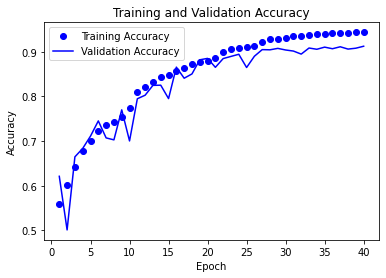

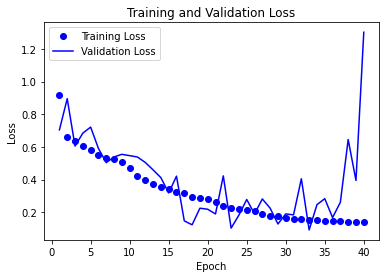

In [52]:
plot_model_acc_and_loss(hist)

[[1.23589e-16]]


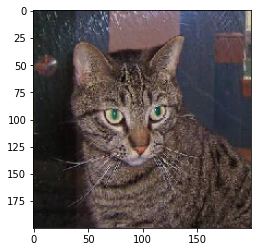

In [90]:
img = image.load_img('/Dogs-vs-Cats-Classifier/dogs-vs-cats/train-set/cats/cat.1.jpg', target_size=(200, 200))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = (x.astype('float32') / 255)
pred = model.predict(x)
print(pred)

In [100]:
model.save('cats-vs-dogs-model.h5')

Saving Perky-Picture.jpeg to Perky-Picture (1).jpeg
[0.00202816]
Perky-Picture.jpeg is a cat


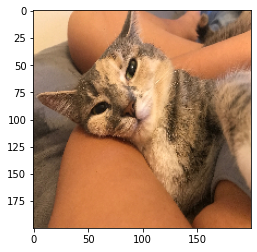

In [101]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = (x.astype('float32') / 255)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=1)
  print(classes[0])
  plt.imshow(img)
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")